In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

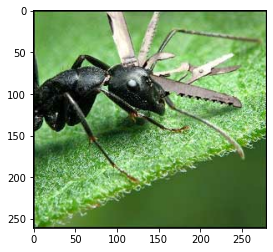

In [2]:
img_path = './datasets/ants/swiss-army-ant.jpg'
img_raw = tf.io.read_file(img_path)
img = tf.io.decode_jpeg(img_raw)
plt.imshow(img)

In [24]:
img.shape

TensorShape([261, 280, 3])

In [3]:
flatten_img = np.array(img.numpy()).flatten().tolist()

In [4]:
from tensorflow.train import BytesList, FloatList, Int64List
from tensorflow.train import Feature, Features, Example

In [5]:
example_with_image = Example(
    features=Features(
        feature={
            "image": Feature(int64_list=Int64List(value=flatten_img))
        }
    )
)

In [6]:
serialized_example = example_with_image.SerializeToString()

In [12]:
feature_description = { 
    "image": tf.io.VarLenFeature('int64')
}

In [18]:
example_with_image = tf.io.parse_single_example(serialized_example, feature_description)

In [21]:
print(example_with_image["image"])

SparseTensor(indices=tf.Tensor(
[[     0]
 [     1]
 [     2]
 ...
 [219237]
 [219238]
 [219239]], shape=(219240, 1), dtype=int64), values=tf.Tensor([34  5 61 ...  0  0  0], shape=(219240,), dtype=int64), dense_shape=tf.Tensor([219240], shape=(1,), dtype=int64))


In [28]:
print(example_with_image["image"].values.numpy())
decoded_img = example_with_image["image"].values.numpy().reshape([261, 280, 3])

[34  5 61 ...  0  0  0]


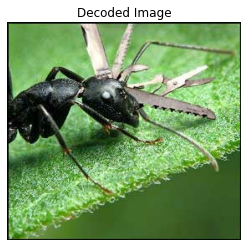

In [29]:
plt.imshow(decoded_img)
plt.title("Decoded Image")
plt.axis("off")
plt.show()

In [32]:
with tf.io.TFRecordWriter("my_ants.tfrecord") as f:
    f.write(serialized_example)

In [33]:
for serialized_example in tf.data.TFRecordDataset(["my_ants.tfrecord"]):
    parsed_example = tf.io.parse_single_example(serialized_example,
                                                feature_description)

In [34]:
de_img = parsed_example["image"].values.numpy().reshape([261, 280, 3])

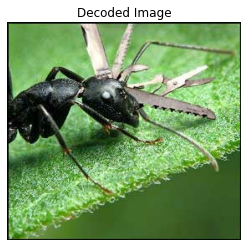

In [35]:
plt.imshow(de_img)
plt.title("Decoded Image")
plt.axis("off")
plt.show()